# Machine Learning - Classification example

###### Links: [Titanic dataset (Kaggle)](https://www.kaggle.com/c/titanic)  |  [Article on this use case ()]()

### 0 - Setup

###### Import pckgs 

In [10]:
from ml_utils import *
import warnings
warnings.filterwarnings("ignore")

###### Import data

In [2]:
dtf = pd.read_csv('data_titanic.csv')
dtf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Shape: (891, 12)
-----------------
PassengerId --> Type:num | Nas: 0(0%) | Min-Max: 1-891 | Possible PK
Survived --> Type:cat | Nas: 0(0%) | Categories: 2
Pclass --> Type:cat | Nas: 0(0%) | Categories: 3
Name --> Type:cat | Nas: 0(0%) | Categories: 891 | Possible PK
Sex --> Type:cat | Nas: 0(0%) | Categories: 2
Age --> Type:num | Nas: 177(19%) | Min-Max: 0-80
SibSp --> Type:cat | Nas: 0(0%) | Categories: 7
Parch --> Type:cat | Nas: 0(0%) | Categories: 7
Ticket --> Type:cat | Nas: 0(0%) | Categories: 681
Fare --> Type:num | Nas: 0(0%) | Min-Max: 0-512
Cabin --> Type:cat | Nas: 687(77%) | Categories: 147
Embarked --> Type:cat | Nas: 2(0%) | Categories: 3


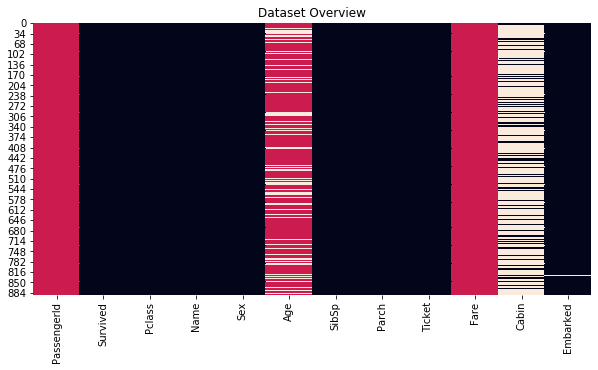

 Categerocial   Numerical   NaN 


In [3]:
dtf_overview(dtf, max_cat=20, figsize=(10,5))

### 1 - Data Analysis

###### Group variables by info
- pk: PassengerId, Name
- y: Survived
- who: Sex, Age, Embarked (which port C=Cherbourg, Q=Queenstown, S=Southampton)
- wealth: Pclass, Ticket, Fare
- where: Cabin
- how many: SibSp (with siblings/spouse), Parch (with parent/children)

In [ ]:
dtf = dtf.set_index("PassengerId")

In [4]:
features = []

###### Target Variable

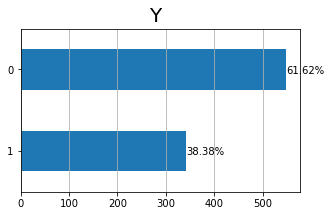

In [3]:
dtf = dtf.rename(columns={"Survived":"Y"})

freqdist_plot(dtf, "Y", figsize=(5,3))

In [6]:
#-> Population mean: 38% of the passengers survived

###### Who? Sex, Age, Embarked

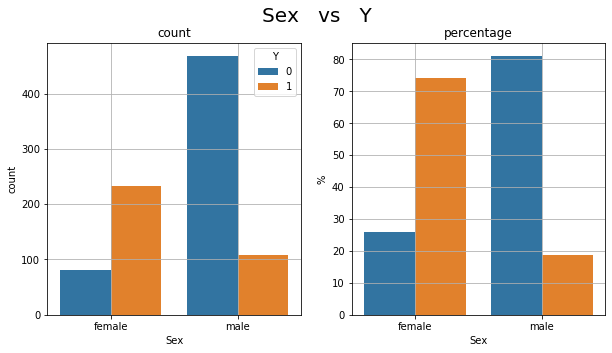

In [7]:
#--- Sex ----#
bivariate_plot(dtf, x="Sex", y="Y", figsize=(10,5))

In [8]:
#-> Sex is Predictive: the surviving rate of females is higher.
features.append("Sex")

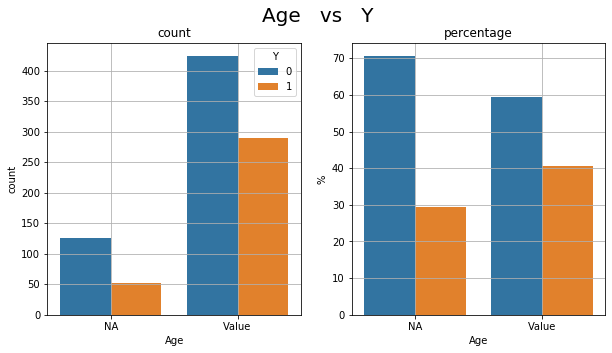

In [9]:
#--- Age ---#
nan_analysis(dtf, na_x="Age", y="Y", max_cat=20, figsize=(10,5))

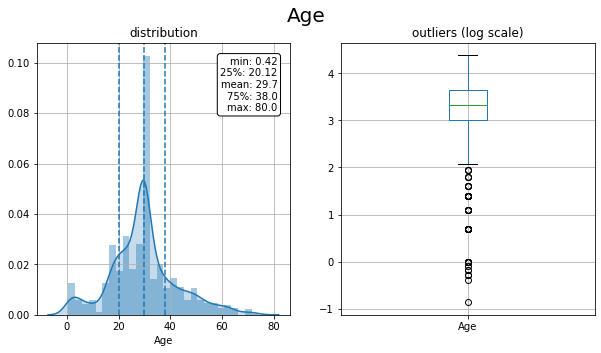

In [10]:
freqdist_plot(dtf, "Age", box_logscale=True, figsize=(10,5))

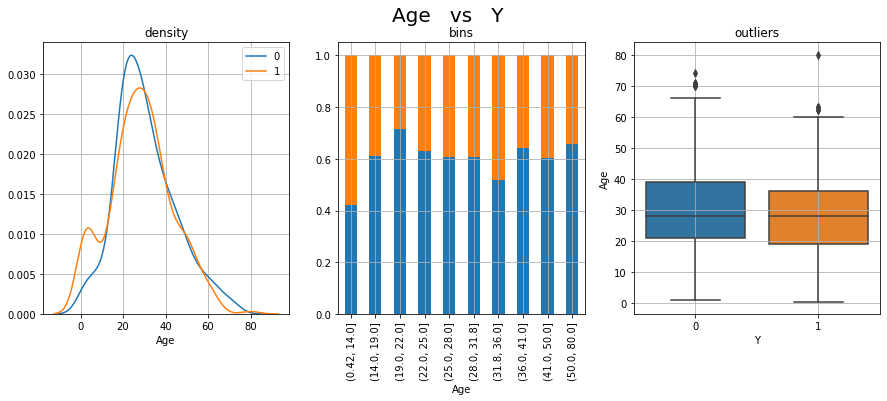

In [11]:
bivariate_plot(dtf, x="Age", y="Y", figsize=(15,5))

In [12]:
#-> Age is Predictive: the Surviving rate is higher for younger passengers, there is a spike in the left tail of Y=1 
# distribution and the first bin of Age (0-16) contains the highest percentage of survived people.
features.append("Age")

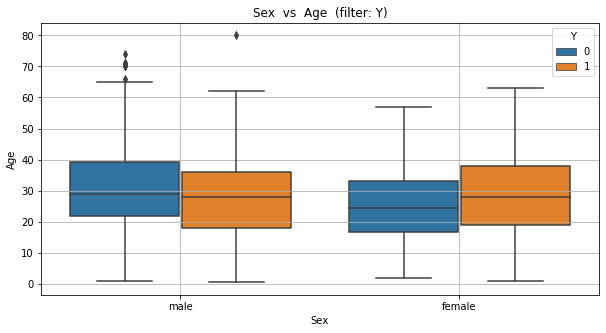

In [13]:
# It appears that they applied the "Save women and children first" code. Let's check:
cross_distributions(dtf, x1="Sex", x2="Age", y="Y", figsize=(10,5))

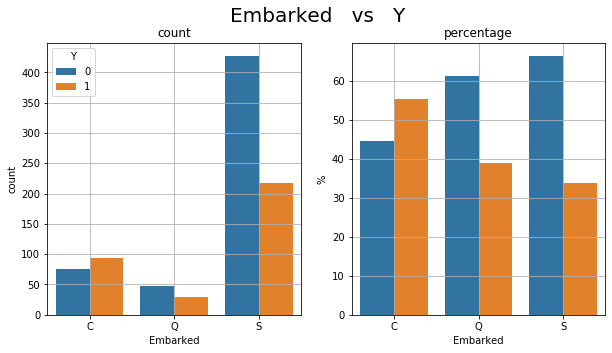

In [14]:
#--- Embarked ---#
bivariate_plot(dtf, x="Embarked", y="Y", figsize=(10,5))

In [15]:
coeff, p = test_corr(dtf, x="Embarked", y="Y")

Cramer Correlation: 0.166 Significant (p-value: 0.0)


In [16]:
#-> Embarked is Predictive: People from port C tend to survive better (that can be because they stayed in a fortunate area
# of the ship or just because they're smarter). Since there aren't many observations, I tested the significance 
# of the correlation (Cramer cat vs cat), it passed.
features.append("Embarked")

###### Wealth? Pclass, Ticket, Fare

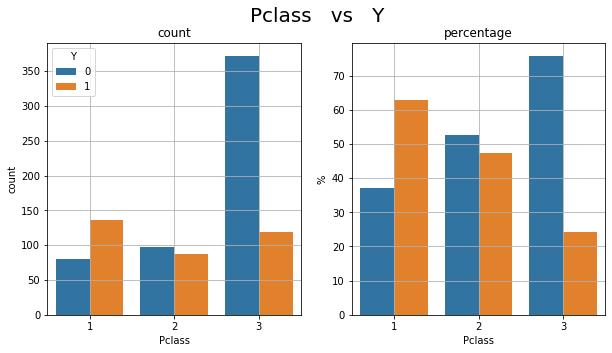

In [17]:
#--- Pclass ---#
bivariate_plot(dtf, x="Pclass", y="Y", figsize=(10,5))

In [18]:
#-> Pclass is Predctive: the richer the higher the probability of surviving.
features.append("Pclass")

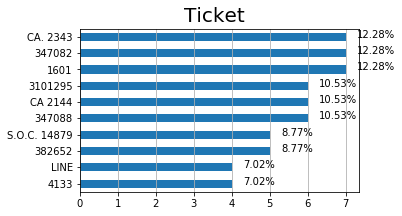

In [19]:
#--- Ticket ---#
freqdist_plot(dtf, "Ticket", top=10, figsize=(5,3))

In [20]:
#-> Ticket is Useless

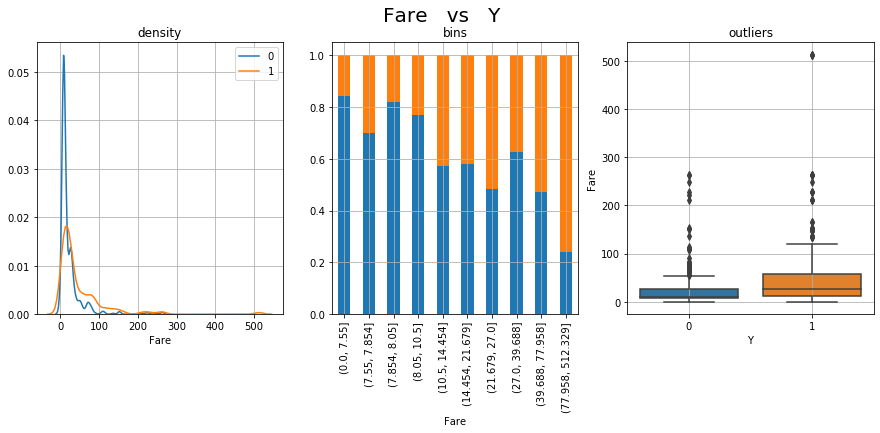

In [21]:
#--- Fare ---#
bivariate_plot(dtf, x="Fare", y="Y", figsize=(15,5))

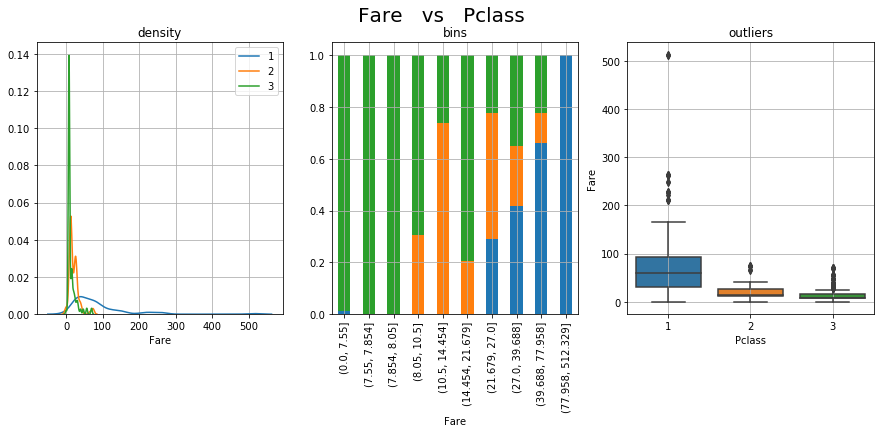

In [9]:
bivariate_plot(dtf, x="Fare", y="Pclass", figsize=(15,5))

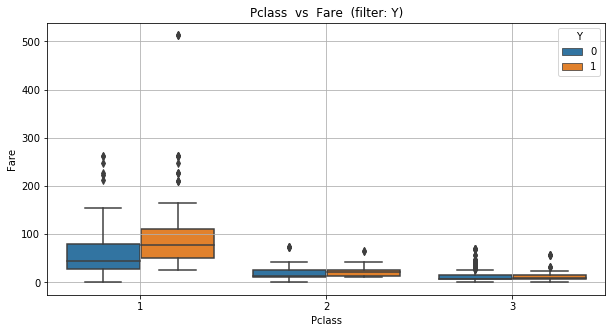

In [23]:
cross_distributions(dtf, x1="Pclass", x2="Fare", y="Y", figsize=(10,5))

In [24]:
#-> Looks there is more information in the first class: who paid higher price survived better.
# I will keep it for now and exclude one of the two in the Features Selection section.
features.append("Fare")

###### Where? Cabin

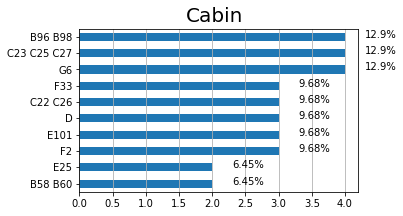

In [25]:
#--- Cabin ---#
freqdist_plot(dtf, "Cabin", top=10, figsize=(5,3))

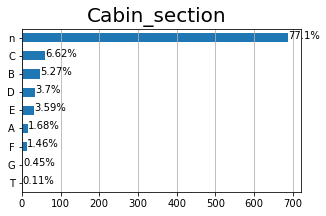

In [26]:
# Useless like this, let's see if the variable can be clustered using the first letter of the cabin:
dtf["Cabin_section"] = dtf["Cabin"].apply(lambda x: str(x)[0])
freqdist_plot(dtf, "Cabin_section", top=10, figsize=(5,3))

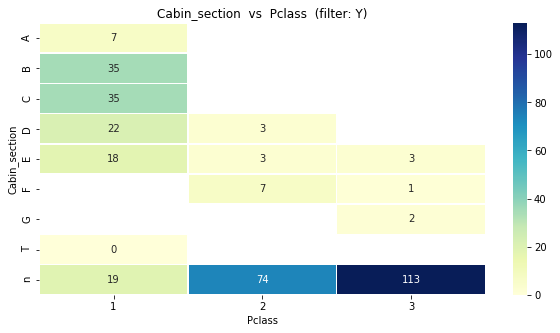

In [27]:
cross_distributions(dtf, x1="Cabin_section", x2="Pclass", y="Y", figsize=(10,5))

In [28]:
coeff, p = test_corr(dtf, x="Cabin_section", y="Y")

Cramer Correlation: 0.32 Significant (p-value: 0.0)


In [29]:
#-> Cabin_section is predictive: for now.
features.append("Cabin_section")

###### How many? SibSp, Parch

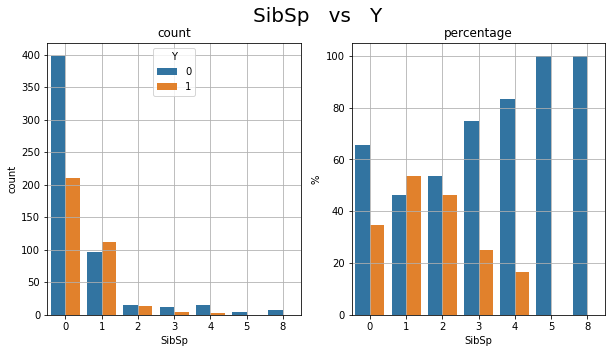

In [30]:
#--- SibSp ---#
bivariate_plot(dtf, x="SibSp", y="Y", figsize=(10,5))

In [31]:
coeff, p = test_corr(dtf, x="SibSp", y="Y")

Cramer Correlation: 0.187 Significant (p-value: 0.0)


In [32]:
#-> SibSp is predictive: for now.
features.append("SibSp")

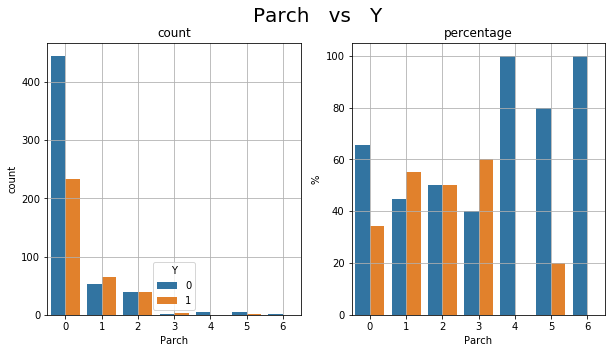

In [33]:
#--- Parch ---#
bivariate_plot(dtf, x="Parch", y="Y", figsize=(10,5))

In [34]:
coeff, p = test_corr(dtf, x="Parch", y="Y")

Cramer Correlation: 0.157 Significant (p-value: 0.0)


In [35]:
#-> Parch is predictive: for now.
features.append("Parch")

###### Summary

In [36]:
dtf = dtf[features+["Y"]]
dtf.head()

,Sex,Age,Embarked,Pclass,Fare,Cabin_section,SibSp,Parch,Y
PassengerId,,,,,,,,,
1,male,22.0,S,3,7.2500,n,1,0,0
2,female,38.0,C,1,71.2833,C,1,0,1
3,female,26.0,S,3,7.9250,n,0,0,1
4,female,35.0,S,1,53.1000,C,1,0,1
5,male,35.0,S,3,8.0500,n,0,0,0


### 2 - Preprocessing

###### To do:
- Dataset partitioning
- Resample
- Treat missings
- Encode categorical data
- Scaling
- Preprocess Test data

In [37]:
check = data_preprocessing(dtf, y="Y")

--- check missing ---
--- check categorical data ---
--- split train/test ---
   OK: step skipped
--- scaling ---
   OK: step skipped


###### Partitioning

In [38]:
dtf_train, dtf_test = dtf_partitioning(dtf, y="Y", test_size=0.3, shuffle=False)

X_train shape: (623, 8) | X_test shape: (268, 8)
y_train mean: 0.39 | y_test mean: 0.36
9 features: ['Sex', 'Age', 'Embarked', 'Pclass', 'Fare', 'Cabin_section', 'SibSp', 'Parch']


In [39]:
dtf_train.head(3)

,Sex,Age,Embarked,Pclass,Fare,Cabin_section,SibSp,Parch,Y
PassengerId,,,,,,,,,
1,male,22.0,S,3,7.2500,n,1,0,0
2,female,38.0,C,1,71.2833,C,1,0,1
3,female,26.0,S,3,7.9250,n,0,0,1


In [40]:
dtf_test.head(3)

,Sex,Age,Embarked,Pclass,Fare,Cabin_section,SibSp,Parch,Y
PassengerId,,,,,,,,,
624,male,21.0,S,3,7.8542,n,0,0,0
625,male,21.0,S,3,16.1000,n,0,0,0
626,male,61.0,S,1,32.3208,D,0,0,0


###### Resample

In [41]:
# no need to resample.

###### Missing values

In [42]:
dtf_train, age_mean = fill_na(dtf_train, x="Age")

--- Replacing Nas with Value: 29.78048780487805 ---


In [43]:
dtf_train, embarked_mode = fill_na(dtf_train, x="Embarked")

--- Replacing Nas with Value: S ---


###### Categorical Encoding

In [44]:
dtf_train = add_dummies(dtf_train, x="Sex", dropx=True)

                Sex  Sex_male
PassengerId                  
1              male         1
2            female         0
3            female         0
4            female         0
5              male         1


In [45]:
dtf_train = add_dummies(dtf_train, x="Embarked", dropx=True)

            Embarked  Embarked_Q  Embarked_S
PassengerId                                 
1                  S           0           1
2                  C           0           0
3                  S           0           1
4                  S           0           1
5                  S           0           1


In [46]:
dtf_train = add_dummies(dtf_train, x="Pclass", dropx=True)

             Pclass  Pclass_2  Pclass_3
PassengerId                            
1                 3         0         1
2                 1         0         0
3                 3         0         1
4                 1         0         0
5                 3         0         1


In [47]:
dtf_train = add_dummies(dtf_train, x="Cabin_section", dropx=True)

            Cabin_section  Cabin_section_B  Cabin_section_C  Cabin_section_D  \
PassengerId                                                                    
1                       n                0                0                0   
2                       C                0                1                0   
3                       n                0                0                0   
4                       C                0                1                0   
5                       n                0                0                0   

             Cabin_section_E  Cabin_section_F  Cabin_section_G  \
PassengerId                                                      
1                          0                0                0   
2                          0                0                0   
3                          0                0                0   
4                          0                0                0   
5                          0               

In [48]:
dtf_train = pop_columns(dtf_train, ["Y"], where="end")
dtf_train.head()

,Age,Fare,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3,Cabin_section_B,Cabin_section_C,Cabin_section_D,Cabin_section_E,Cabin_section_F,Cabin_section_G,Cabin_section_T,Cabin_section_n,Y
PassengerId,,,,,,,,,,,,,,,,,,
1,22.0,7.2500,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0
2,38.0,71.2833,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,26.0,7.9250,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1
4,35.0,53.1000,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
5,35.0,8.0500,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0


###### Scaling

In [49]:
scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

In [50]:
dtf_train, scaler = scaling(dtf_train, y="Y", scalerX=scaler, task="classification")

In [51]:
dtf_train.head()

,Age,Fare,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3,Cabin_section_B,Cabin_section_C,Cabin_section_D,Cabin_section_E,Cabin_section_F,Cabin_section_G,Cabin_section_T,Cabin_section_n,Y
PassengerId,,,,,,,,,,,,,,,,,,
1,0.302491,0.014151,0.125,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
2,0.530249,0.139136,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.359431,0.015469,0.000,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,0.487544,0.103644,0.125,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
5,0.487544,0.015713,0.000,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0


Shape: (623, 18)
-----------------
Age --> Type:num | Nas: 0(0%) | Min-Max: 0-0
Fare --> Type:num | Nas: 0(0%) | Min-Max: 0-1
SibSp --> Type:cat | Nas: 0(0%) | Categories: 7
Parch --> Type:cat | Nas: 0(0%) | Categories: 6
Sex_male --> Type:cat | Nas: 0(0%) | Categories: 2
Embarked_Q --> Type:cat | Nas: 0(0%) | Categories: 2
Embarked_S --> Type:cat | Nas: 0(0%) | Categories: 2
Pclass_2 --> Type:cat | Nas: 0(0%) | Categories: 2
Pclass_3 --> Type:cat | Nas: 0(0%) | Categories: 2
Cabin_section_B --> Type:cat | Nas: 0(0%) | Categories: 2
Cabin_section_C --> Type:cat | Nas: 0(0%) | Categories: 2
Cabin_section_D --> Type:cat | Nas: 0(0%) | Categories: 2
Cabin_section_E --> Type:cat | Nas: 0(0%) | Categories: 2
Cabin_section_F --> Type:cat | Nas: 0(0%) | Categories: 2
Cabin_section_G --> Type:cat | Nas: 0(0%) | Categories: 2
Cabin_section_T --> Type:cat | Nas: 0(0%) | Categories: 2
Cabin_section_n --> Type:cat | Nas: 0(0%) | Categories: 2
Y --> Type:cat | Nas: 0(0%) | Categories: 2


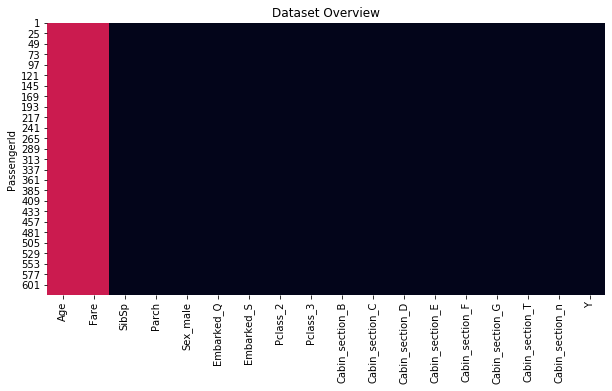

 Categerocial   Numerical   NaN 


In [52]:
dtf_overview(dtf_train)

###### Preprocess Test data

In [53]:
## Na
dtf_test = fill_na(dtf_test, x="Age", value=age_mean)

--- Replacing Nas with Value: 29.78048780487805 ---


In [54]:
## Categorical
dtf_test = add_dummies(dtf_test, x="Sex", dropx=True)
dtf_test = add_dummies(dtf_test, x="Embarked", dropx=True)
dtf_test = add_dummies(dtf_test, x="Pclass", dropx=True)
dtf_test = add_dummies(dtf_test, x="Cabin_section", dropx=True)

                Sex  Sex_male
PassengerId                  
624            male         1
625            male         1
626            male         1
627            male         1
628          female         0
            Embarked  Embarked_Q  Embarked_S
PassengerId                                 
624                S           0           1
625                S           0           1
626                S           0           1
627                Q           1           0
628                S           0           1
             Pclass  Pclass_2  Pclass_3
PassengerId                            
624               3         0         1
625               3         0         1
626               1         0         0
627               2         1         0
628               1         0         0
            Cabin_section  Cabin_section_B  Cabin_section_C  Cabin_section_D  \
PassengerId                                                                    
624                     n          

In [55]:
## There are two columns less in the Test set: Cabin_section_T, Cabin_section_G 
dtf_test["Cabin_section_T"], dtf_test["Cabin_section_G"] = 0, 0

In [56]:
dtf_test = dtf_test[dtf_train.columns]
dtf_test.head()

,Age,Fare,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3,Cabin_section_B,Cabin_section_C,Cabin_section_D,Cabin_section_E,Cabin_section_F,Cabin_section_G,Cabin_section_T,Cabin_section_n,Y
PassengerId,,,,,,,,,,,,,,,,,,
624,21.0,7.8542,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0
625,21.0,16.1000,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0
626,61.0,32.3208,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
627,57.0,12.3500,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0
628,21.0,77.9583,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1


In [57]:
## Scale
dtf_test, _ = scaling(dtf_test, y="Y", scalerX=scaler, fitted=True)

Shape: (268, 18)
-----------------
Age --> Type:num | Nas: 0(0%) | Min-Max: 0-1
Fare --> Type:num | Nas: 0(0%) | Min-Max: 0-1
SibSp --> Type:cat | Nas: 0(0%) | Categories: 7
Parch --> Type:cat | Nas: 0(0%) | Categories: 6
Sex_male --> Type:cat | Nas: 0(0%) | Categories: 2
Embarked_Q --> Type:cat | Nas: 0(0%) | Categories: 2
Embarked_S --> Type:cat | Nas: 0(0%) | Categories: 2
Pclass_2 --> Type:cat | Nas: 0(0%) | Categories: 2
Pclass_3 --> Type:cat | Nas: 0(0%) | Categories: 2
Cabin_section_B --> Type:cat | Nas: 0(0%) | Categories: 2
Cabin_section_C --> Type:cat | Nas: 0(0%) | Categories: 2
Cabin_section_D --> Type:cat | Nas: 0(0%) | Categories: 2
Cabin_section_E --> Type:cat | Nas: 0(0%) | Categories: 2
Cabin_section_F --> Type:cat | Nas: 0(0%) | Categories: 2
Cabin_section_G --> Type:cat | Nas: 0(0%) | Categories: 1
Cabin_section_T --> Type:cat | Nas: 0(0%) | Categories: 1
Cabin_section_n --> Type:cat | Nas: 0(0%) | Categories: 2
Y --> Type:cat | Nas: 0(0%) | Categories: 2


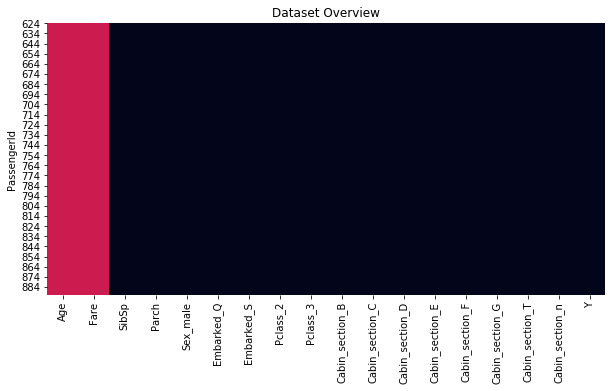

 Categerocial   Numerical   NaN 


In [58]:
dtf_overview(dtf_test)

### 3 - Baseline (xgboost)

###### Plan:
- Feature Selection: by correlation, by p-value, by importance
- Model Design
- Train / Test
- Evaluate
- Visualize model
- Explainability

###### Features Selection

--- WARNING: Factorizing labels of Sex ---
--- WARNING: Factorizing labels of Embarked ---
--- WARNING: Factorizing labels of Cabin_section ---


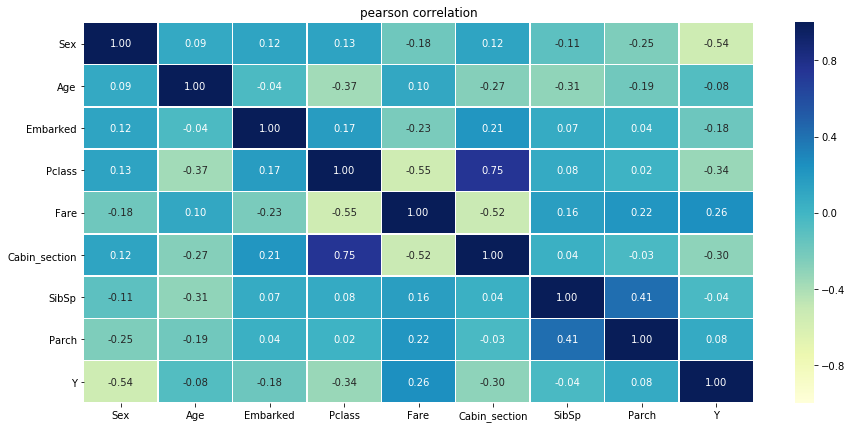

In [59]:
#--- correlation ---#
corr = corrmatrix_plot(dtf, method="pearson", annotation=True, figsize=(15,7))

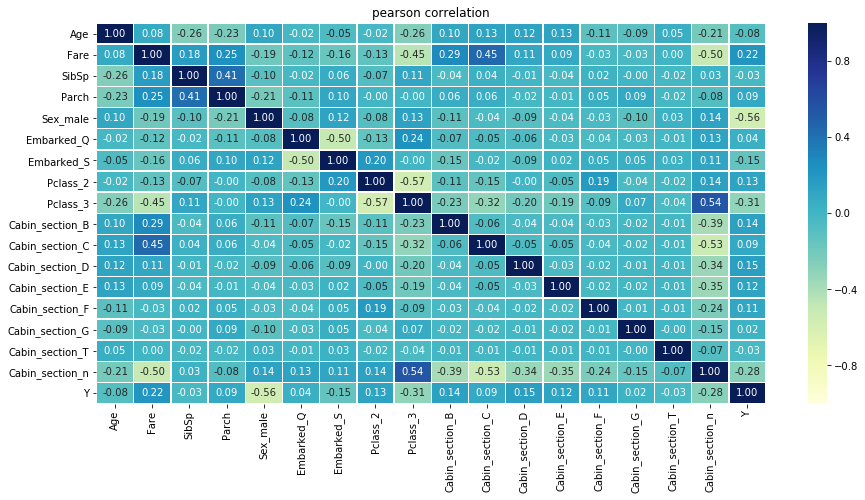

In [60]:
corr = corrmatrix_plot(dtf_train, method="pearson", annotation=True, figsize=(15,7))

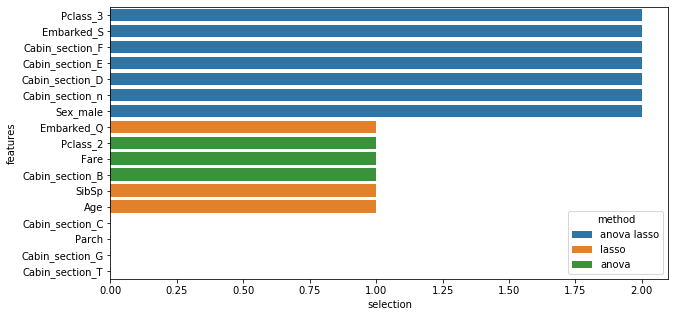

In [61]:
#--- p values ---#
dic_feat_sel = features_selection(dtf_train, y="Y", task="classification", top=10, figsize=(10,5))

--- model used ---
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


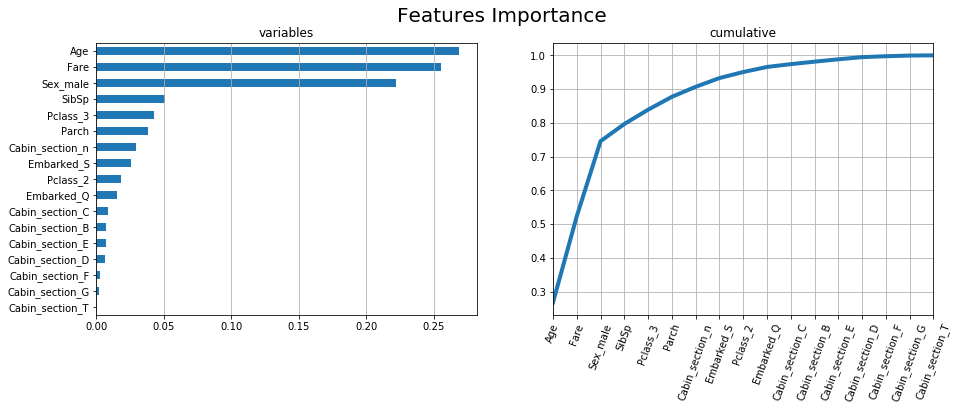

In [62]:
#--- importance ---#
model = ensemble.RandomForestClassifier(n_estimators=100, criterion="entropy", random_state=0)

feat_imp = features_importance(X=dtf_train.drop("Y",axis=1).values, y=dtf_train["Y"].values, 
                               X_names=dtf_train.drop("Y",axis=1).columns.tolist(), 
                               model=model, task="classification", figsize=(15,5))

In [63]:
# -> selection
X_names = ["Age", "Fare", "Sex_male", "SibSp", "Pclass_3", "Parch", "Cabin_section_n", "Embarked_S", "Pclass_2",
           "Cabin_section_F", "Cabin_section_E", "Cabin_section_D"]

###### Model Design

In [64]:
X_train = dtf_train[X_names].values
y_train = dtf_train["Y"].values

In [65]:
model = ensemble.GradientBoostingClassifier()

In [66]:
param_dic = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001],      #weighting factor for the corrections by new trees when added to the model
             'n_estimators':[100,250,500,750,1000,1250,1500,1750],  #number of trees added to the model
             'max_depth':[2,3,4,5,6,7],                             #maximum depth of the tree
             'min_samples_split':[2,4,6,8,10,20,40,60,100],         #sets the minimum number of samples to split
             'min_samples_leaf':[1,3,5,7,9],                        #the minimum number of samples to form a leaf
             'max_features':[2,3,4,5,6,7],                          #square root of features is usually a good starting point
             'subsample':[0.7,0.75,0.8,0.85,0.9,0.95,1]}            #the fraction of samples to be used for fitting the individual base learners. Values lower than 1 generally lead to a reduction of variance and an increase in bias.

--- RandomSearch ---
Best Model parameters: {'subsample': 1, 'n_estimators': 250, 'min_samples_split': 4, 'min_samples_leaf': 5, 'max_features': 6, 'max_depth': 5, 'learning_rate': 0.01}
Best Model mean accuracy: 0.8458967741935484

--- Kfold Validation ---
mean accuracy - base: 0.8172043010752688  --> best: 0.8268049155145929


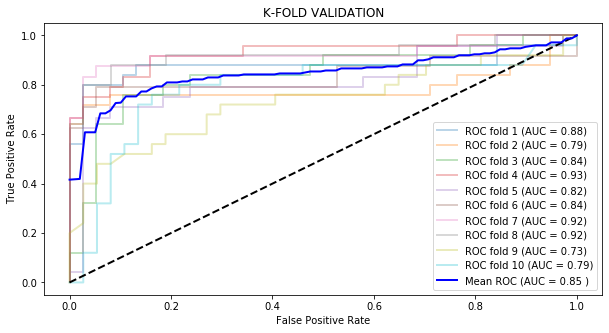

In [67]:
# this takes a while
model = tune_classif_model(X_train, y_train, model, param_dic, scoring="accuracy", 
                           searchtype="RandomSearch", n_iter=1000, cv=10, figsize=(10,5))

###### Train / Test

In [68]:
X_test = dtf_test[X_names].values
y_test = dtf_test["Y"].values

In [69]:
model, predicted_prob, predicted = fit_classif_model(model, X_train, y_train, X_test, threshold=0.5)

###### Evaluate

Accuracy (overall correct predictions): 0.85
Auc: 0.89
Recall (all 1s predicted right): 0.71
Precision (confidence when predicting a 1): 0.84
Detail:
              precision    recall  f1-score   support

           0       0.85      0.92      0.89       172
           1       0.84      0.71      0.77        96

    accuracy                           0.85       268
   macro avg       0.84      0.82      0.83       268
weighted avg       0.85      0.85      0.84       268



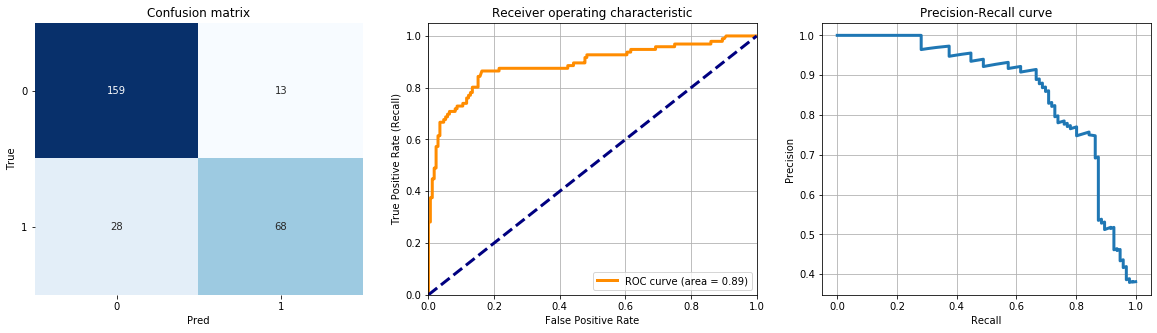

In [70]:
evaluate_classif_model(y_test, predicted, predicted_prob, figsize=(20,5))

###### Visualize model

In [71]:
model2d = ensemble.GradientBoostingClassifier()
model2d.set_params(**{'subsample':1, 'n_estimators':1750, 'min_samples_split':6, 'min_samples_leaf':1, 'max_depth':4, 'learning_rate':0.001})

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.001, loss='deviance', max_depth=4,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=6,
                           min_weight_fraction_leaf=0.0, n_estimators=1750,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

--- unsupervised: pca ---
--- fitting 2d model ---
--- plotting test set ---


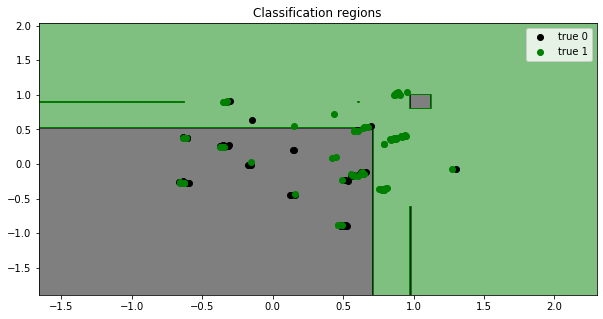

In [72]:
plot2d_classif_model(X_train, y_train, X_test, y_test, model2d, annotate=False, figsize=(10,5))

###### Explainability

True: 1 --> Pred: True | Prob: 0.9197305240286457


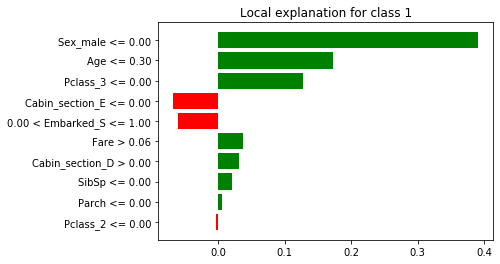

In [73]:
i = 4
print("True:", y_test[i], "--> Pred:", predicted[i], "| Prob:", np.max(predicted_prob[i]))

exp = explainer(X_train, X_names, model, y_train,  X_test_instance=X_test[i], top=10, task="classification")

### 4 - Model Desing & Testing (neural network)

###### Plan:
- Model Design
- Train / Test
- Evaluate
- Visualize model

###### Model Design

In [74]:
X_train = dtf_train.drop("Y", axis=1).values
y_train = dtf_train["Y"].values

X_train.shape

(623, 17)

In [75]:
model = models.Sequential()
### layer 1
model.add(layers.Dense(input_dim=17, units=int(round((17+1)/2)), kernel_initializer='uniform', activation='relu'))
model.add(layers.Dropout(rate=0.2))
### layer 2
model.add(layers.Dense(units=int(round((17+1)/2)), kernel_initializer='uniform', activation='relu'))
model.add(layers.Dropout(rate=0.2))
### layer output
model.add(layers.Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


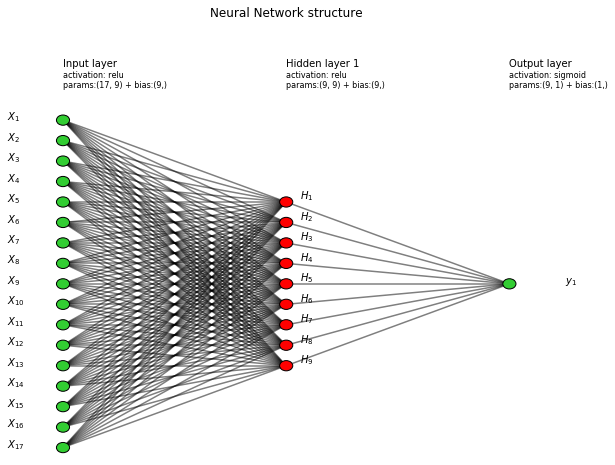

In [81]:
visualize_ann(model, titles=True, figsize=(10,8))

###### Train / Test

In [76]:
X_test = dtf_test.drop("Y", axis=1).values
y_test = dtf_test["Y"].values

X_test.shape

(268, 17)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 9)                 162       
_________________________________________________________________
dropout (Dropout)            (None, 9)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 9)                 90        
_________________________________________________________________
dropout_1 (Dropout)          (None, 9)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 10        
Total params: 262
Trainable params: 262
Non-trainable params: 0
_________________________________________________________________
None
Instructions for updating:
Use tf.cast instead.


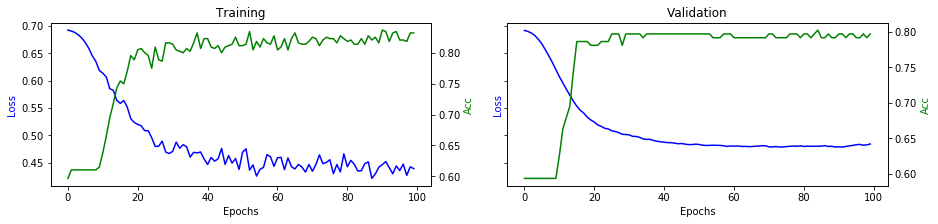

In [77]:
model, predicted_prob, predicted = fit_ann_classif(X_train, y_train, X_test, model, batch_size=32, epochs=100, threshold=0.5)

###### Evaluate

Accuracy (overall correct predictions): 0.81
Auc: 0.85
Recall (all 1s predicted right): 0.62
Precision (confidence when predicting a 1): 0.79
Detail:
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       172
           1       0.79      0.62      0.70        96

    accuracy                           0.81       268
   macro avg       0.80      0.77      0.78       268
weighted avg       0.80      0.81      0.80       268



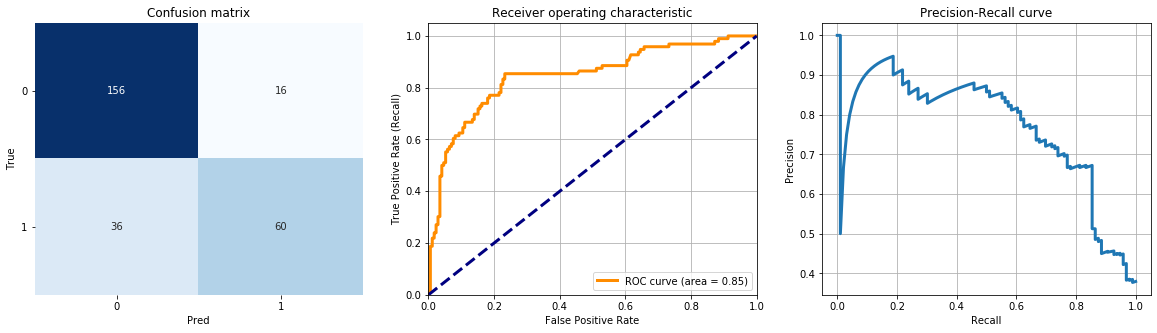

In [78]:
evaluate_classif_model(y_test, predicted, predicted_prob, figsize=(20,5))

###### Visualize model

In [79]:
model2d = models.Sequential()
### layer 1
model2d.add(layers.Dense(input_dim=2, units=int(round((17+1)/2)), kernel_initializer='uniform', activation='relu'))
model2d.add(layers.Dropout(rate=0.2))
### layer 2
model2d.add(layers.Dense(units=int(round((17+1)/2)), kernel_initializer='uniform', activation='relu'))
model2d.add(layers.Dropout(rate=0.2))
### layer output
model2d.add(layers.Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
model2d.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

--- unsupervised: pca ---
--- fitting 2d model ---
623/623 [==============================] - 0s 515us/sample - loss: 0.6923 - acc: 0.5955
--- plotting test set ---


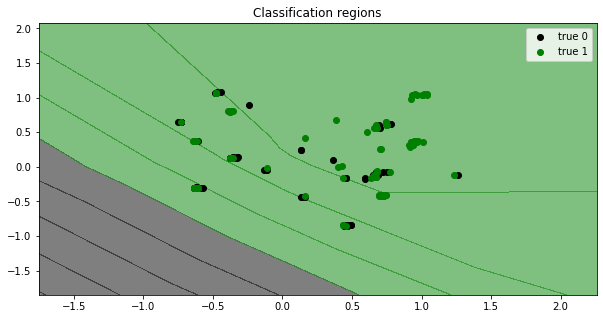

In [80]:
plot2d_classif_model(X_train, y_train, X_test, y_test, model2d, annotate=False, figsize=(10,5))